In [152]:
# to prevent unnecessary warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import cv2
import json
import requests
from tqdm import tqdm

print(tf.__version__)

2.4.0-dev20200914


In [153]:
#importing necessary libraries
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
class_names = ['elefante_train','farfalla_train','mucca_train','pecora_train','scoiattolo_train']

IMG_SIZE = 100

In [154]:
#read the data from a directory
def get_data_from_folder(path):
  data = []
  for class_name in class_names: # iterate through classes
    try:
      files = glob.glob(path+"/"+class_name+"/*") # get files in each folder(class)
      for f in files:
        img = cv2.imread(f) #read the image
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resize the image
        data.append([np.array(img),class_names.index(class_name)]) #Append images and corresponding labels to data
    except:
      pass
  np.random.shuffle(data)
  return data

In [155]:
training_data = get_data_from_folder('/home/walid/Pictures/animal_dataset_intermediate/train')

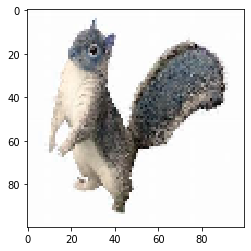

In [293]:
plt.imshow(training_data[4][0])

In [292]:
training_data[4][1]

4

In [157]:
import random
a=[[[1,2,3],2],[[1,0,3],4],[[0,2,3],0],[[1,2,0],1]]
print(a)



[[[1, 2, 3], 2], [[1, 0, 3], 4], [[0, 2, 3], 0], [[1, 2, 0], 1]]


In [158]:
adas=random.shuffle(a)
print(adas)

None


In [159]:
training_data[3][0].shape

(100, 100, 3)

In [160]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

image_size = (100, 100)
batch_size = 32

train_ds = image_dataset_from_directory(
    "/home/walid/Pictures/animal_dataset_intermediate/train",
    labels = "inferred",
    label_mode = 'int',
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds =image_dataset_from_directory(
    "/home/walid/Pictures/animal_dataset_intermediate/train",
    labels = "inferred",
    label_mode = 'int',
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)


Found 8196 files belonging to 5 classes.
Using 6557 files for training.
Found 8196 files belonging to 5 classes.
Using 1639 files for validation.


/home/walid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


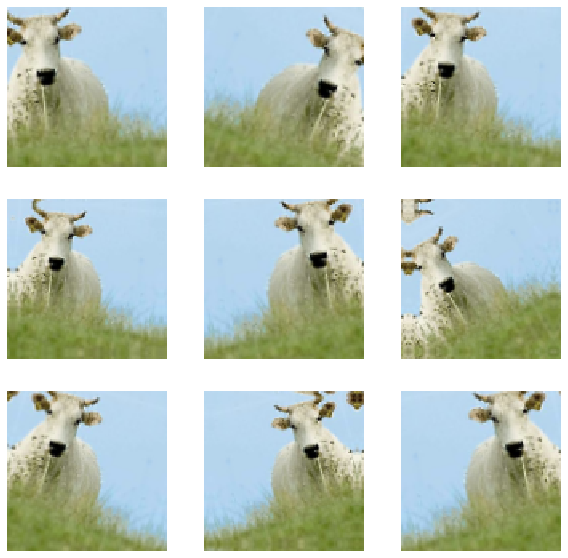

In [161]:


#Augmenting the images
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(2):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")



In [162]:
import pandas as pd

csv=pd.read_csv('/home/walid/Pictures/animal_dataset_intermediate/Testing_set_animals.csv')
file_name=csv.filename
print(file_name[0])
print(file_name.shape)

e030b20928e90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg
(910,)


In [163]:
path='/home/walid/Pictures/animal_dataset_intermediate/test'
image_count = glob.glob(path+"/"+file_name[0])

In [164]:
import cv2 
import os 
import glob
test_data.clear()

for i in range(0,file_name.shape[0]): 
    img = cv2.imread('/home/walid/Pictures/animal_dataset_intermediate/test/'+file_name[i]) 
    img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    test_data.append(img)

In [165]:
file_name.shape[0]

910

In [166]:
len(test_data)

910

In [78]:
#files[0].split("/")[6]

In [79]:
#file_name[0]=="e13cb60a2bf31c22d2524518b7444f92e37fe5d404b0144390f8c078a0eabd_640.jpg"

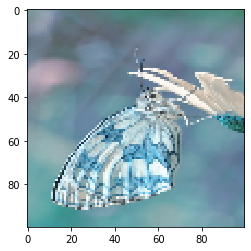

In [167]:
plt.imshow(test_data[0])

In [169]:
files.index("/home/walid/Pictures/animal_dataset_intermediate/test/"+ 'e13cb60a2bf31c22d2524518b7444f92e37fe5d404b0144390f8c078a0eabd_640.jpg')

505

In [170]:
file_name[0]

'e030b20928e90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg'

In [171]:
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

In [172]:
augmented_train_ds.shape()

AttributeError: 'MapDataset' object has no attribute 'shape'

In [173]:


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                                   rescale = 1./255., # rescaling
                                   rotation_range = 40,  # for augmentation
                                   width_shift_range = 0.2,
                                   validation_split = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


train_generator = train_datagen.flow_from_directory("/home/walid/Pictures/animal_dataset_intermediate/train",
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=32,
    subset="training",
    class_mode="categorical",
    shuffle=True,
    seed=42)
                                            


Found 6558 images belonging to 5 classes.


In [174]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.,validation_split = 0.2)

val_generator = val_datagen.flow_from_directory("/home/walid/Pictures/animal_dataset_intermediate/train",
                                                batch_size = 32,
                                                color_mode="rgb",
                                                subset = "validation",
                                                class_mode = 'categorical', 
                                                target_size = (100, 100))

Found 1638 images belonging to 5 classes.


In [175]:
from tensorflow.keras import layers
from tensorflow.keras import models


model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [176]:
from tensorflow.keras import optimizers

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [177]:
#create the model and fit the data
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=val_generator)


Epoch 1/30
100/100 [==============================] - 57s 559ms/step - loss: 1.5269 - accuracy: 0.2937 - val_loss: 1.2819 - val_accuracy: 0.4377
Epoch 2/30
100/100 [==============================] - 60s 599ms/step - loss: 1.3107 - accuracy: 0.4254 - val_loss: 1.3044 - val_accuracy: 0.4219
Epoch 3/30
100/100 [==============================] - 65s 648ms/step - loss: 1.2410 - accuracy: 0.4780 - val_loss: 1.0975 - val_accuracy: 0.5647
Epoch 4/30
100/100 [==============================] - 67s 669ms/step - loss: 1.1628 - accuracy: 0.5457 - val_loss: 1.0883 - val_accuracy: 0.5708
Epoch 5/30
100/100 [==============================] - 64s 634ms/step - loss: 1.1330 - accuracy: 0.5262 - val_loss: 1.0043 - val_accuracy: 0.6001
Epoch 6/30
100/100 [==============================] - 62s 621ms/step - loss: 1.0469 - accuracy: 0.5799 - val_loss: 1.0488 - val_accuracy: 0.5665
Epoch 7/30
100/100 [==============================] - 59s 591ms/step - loss: 1.0376 - accuracy: 0.5704 - val_loss: 0.8990 - val_ac

In [179]:
#create the model and fit the data
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=val_generator)

Epoch 1/50
100/100 [==============================] - 54s 537ms/step - loss: 0.6310 - accuracy: 0.7609 - val_loss: 0.7585 - val_accuracy: 0.7222
Epoch 2/50
100/100 [==============================] - 73s 731ms/step - loss: 0.6420 - accuracy: 0.7530 - val_loss: 0.8310 - val_accuracy: 0.6972
Epoch 3/50
100/100 [==============================] - 64s 642ms/step - loss: 0.6099 - accuracy: 0.7630 - val_loss: 0.6643 - val_accuracy: 0.7595
Epoch 4/50
100/100 [==============================] - 64s 644ms/step - loss: 0.6048 - accuracy: 0.7722 - val_loss: 0.5987 - val_accuracy: 0.7857
Epoch 5/50
100/100 [==============================] - 64s 638ms/step - loss: 0.6134 - accuracy: 0.7669 - val_loss: 0.6976 - val_accuracy: 0.7399
Epoch 6/50
100/100 [==============================] - 63s 632ms/step - loss: 0.6025 - accuracy: 0.7624 - val_loss: 0.6720 - val_accuracy: 0.7625
Epoch 7/50
100/100 [==============================] - 64s 638ms/step - loss: 0.6320 - accuracy: 0.7608 - val_loss: 0.6557 - val_ac

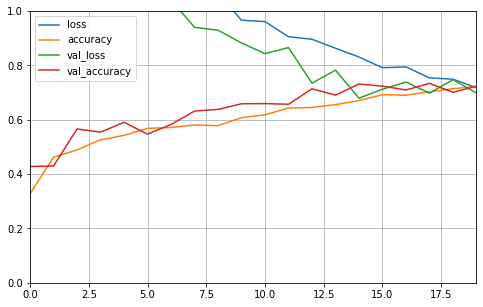

In [140]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

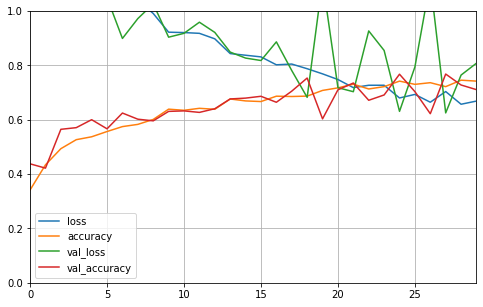

In [178]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
%tensorboard --logdir logs/fit

In [141]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [142]:
from tensorflow.keras import models
from tensorflow.keras import layers

md = models.Sequential()
md.add(conv_base)
md.add(layers.Flatten())
md.add(layers.Dense(512, activation='relu'))
md.add(layers.Dense(256, activation='relu'))
md.add(layers.Dense(5, activation='softmax'))

In [148]:
from tensorflow.keras import optimizers
import keras
md.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [149]:
#checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [ ]:
history = md.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=val_generator,
      validation_steps=50)

In [235]:
a=np.array(test_data[0])
a=a/255

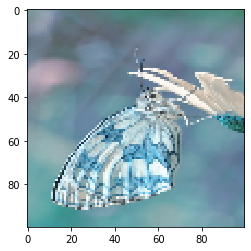

In [238]:
plt.imshow(a)

In [229]:

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.)

test_generator = val_datagen.flow_from_directory("/home/walid/Pictures/animal_dataset_intermediate/test",
                                                batch_size = 32,
                                                color_mode="rgb",
                                                class_mode = 'categorical', 
                                                target_size = (100, 100))

Found 0 images belonging to 0 classes.


In [326]:
import numpy as np

a=0
final_predictions=[]
for i in range (0, 910):
    a=test_data[i]
    a=np.array([a])
    a=a/225
    pred=model.predict(a)
    predicted_labels= np.argmax(pred,axis=1)
    final_predictions.append(predicted_labels)



In [343]:
from pandas import DataFrame
pred_df = DataFrame (final_predictions,columns=['predicted'])

pred_df 

,predicted
0,1
1,1
2,4
3,1
4,1
...,...
905,1
906,1
907,1
908,1


In [382]:
pred_df.replace(to_replace ="farfalla_train", 
                 value ="farfalla",inplace=True) 

In [383]:
pred_df.head(100)

,predicted
0,farfalla
1,farfalla
2,scoiattolo
3,farfalla
4,farfalla
...,...
95,pecora
96,farfalla
97,elefante
98,pecora


In [384]:
pred_df.to_csv (r'/home/walid/Pictures/animal_dataset_intermediate/after_predicted.csv', index = False, header=True)

In [372]:
#class_names = ['elefante_train','farfalla_train','mucca_train','pecora_train','scoiattolo_train']

In [317]:
len(test_data)

910

In [371]:
#preds=model.predict(a)

In [307]:
#predicted_labels  = np.argmax(preds,axis=1)

In [370]:
#predicted_labels 